<a href="https://colab.research.google.com/github/iamvisithras/Singapore_Resale_Flat_Prices_Predicting/blob/main/Singapore_resale_flat_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder


Reading the "csv" files (Registration)

In [4]:
#Reading all the csv files
# reading the 2012 to 2014
df_1= pd.read_csv(r"/content/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df_1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0


In [5]:
# reading the 2015 to 2016
df_2= pd.read_csv(r"/content/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df_2.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
37151,2016-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0
37152,2016-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,70,735000.0


In [6]:
# reading the 2017 to onwards
df_3= pd.read_csv(r"/content/Resale flat prices based on registration date from Jan-2017 onwards.csv")
df_3.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0



Preprocessing

In [7]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
244133,2025-05,YISHUN,EXECUTIVE,828,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,61 years 09 months,1000000.0
244134,2025-05,YISHUN,MULTI-GENERATION,632,YISHUN ST 61,04 TO 06,147.0,Multi Generation,1987,61 years 06 months,945000.0


In [8]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244135 entries, 0 to 244134
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                244135 non-null  object 
 1   town                 244135 non-null  object 
 2   flat_type            244135 non-null  object 
 3   block                244135 non-null  object 
 4   street_name          244135 non-null  object 
 5   storey_range         244135 non-null  object 
 6   floor_area_sqm       244135 non-null  float64
 7   flat_model           244135 non-null  object 
 8   lease_commence_date  244135 non-null  int64  
 9   remaining_lease      244135 non-null  object 
 10  resale_price         244135 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.5+ MB


In [9]:
df_4.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [10]:
# This Dataset have not any null values

Encoding the catogarical columns and

chaning the datatype

In [11]:
df_4.head(2)


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [12]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [13]:
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])

In [14]:
df_5.head(2)


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [15]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [16]:
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month

In [17]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [18]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [19]:
df_5["town"].nunique()

26

In [20]:
df_5["flat_type"].unique()


array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [21]:
df_5["flat_type"].nunique()

7

In [22]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [23]:
df_5["flat_model"].nunique()

21

In [24]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [25]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [26]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [27]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [28]:
df_5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
244133,5,25,5.0,04 TO 06,142.0,3.0,1988,61 years 09 months,1000000.0,828 YISHUN ST 81,2025
244134,5,25,6.0,04 TO 06,147.0,11.0,1987,61 years 06 months,945000.0,632 YISHUN ST 61,2025


In [29]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)


In [30]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)


In [31]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [32]:
df_5["address"].nunique()


9669

In [33]:
# Address have 9559 unique values in the 207823 , so i encode it for the correlation checking
# I chooshing the "LabelEncoder" for the "address" column

df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [34]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [35]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [36]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])


In [37]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [38]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)

In [39]:
df_6= pd.concat([df_5,df_data],axis=1)

In [40]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [41]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address',
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [42]:
df_8=df_7.sort_values(by=["year","month"])

In [43]:
df_8.to_csv("ResaleFlatPrices.csv", index= False)

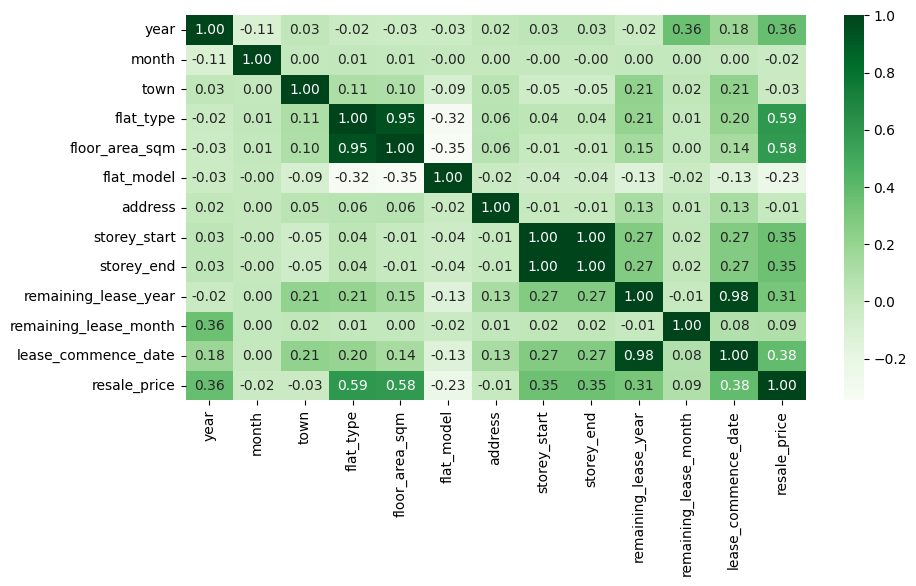

In [44]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [45]:
df_final= pd.read_csv(r"/content/ResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1663,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6650,1,3,65,0,1981,275000.0


In [46]:
# checking the duplicate values
df_final.duplicated().sum()

np.int64(326)

In [47]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [48]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
243807,2025,5,25,5.0,142.0,3.0,8962,4,6,61,9,1988,1000000.0
243808,2025,5,25,6.0,147.0,11.0,7431,4,6,61,6,1987,945000.0


In [49]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns

In [50]:
df_final_2= df_final_1.drop(columns=["month","address"])

In [51]:
df_final_2.tail(2)


,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
243807,2025,25,5.0,142.0,3.0,4,6,61,9,1988,1000000.0
243808,2025,25,6.0,147.0,11.0,4,6,61,6,1987,945000.0


In [52]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


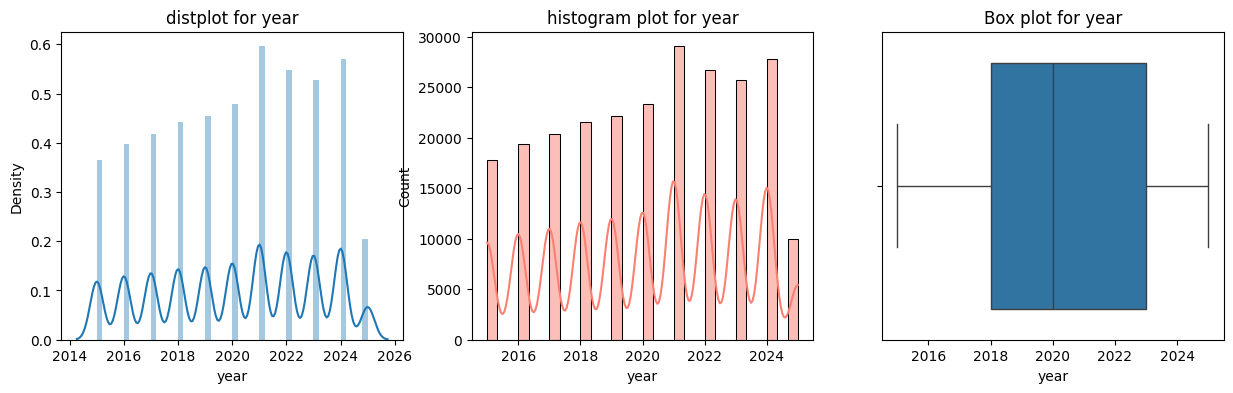

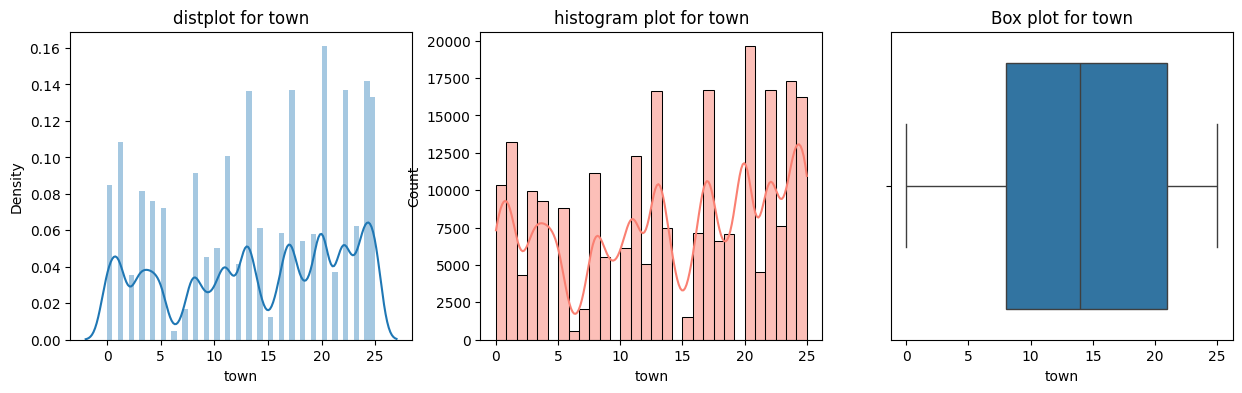

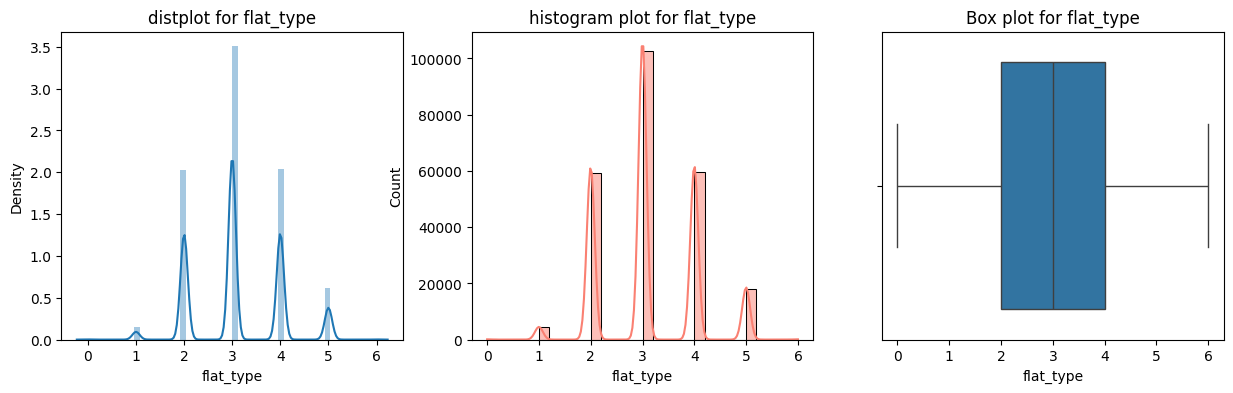

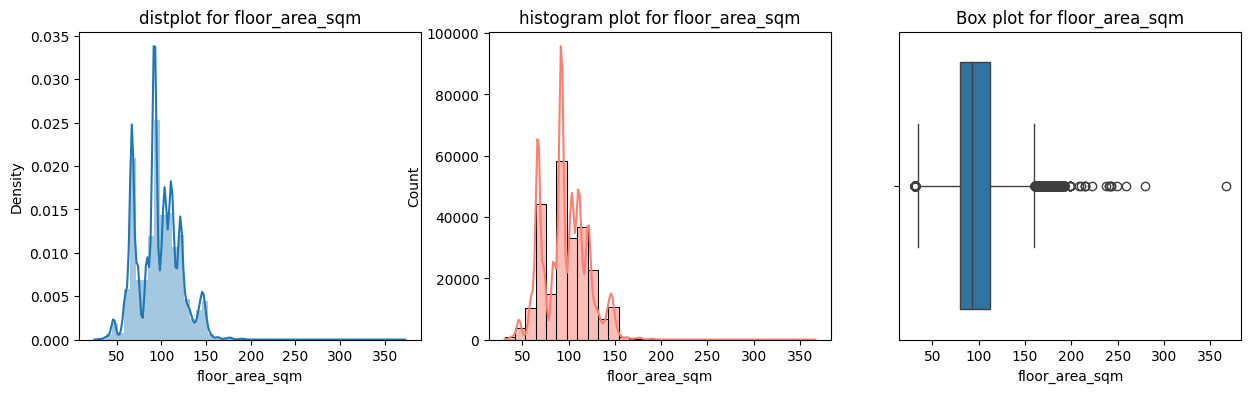

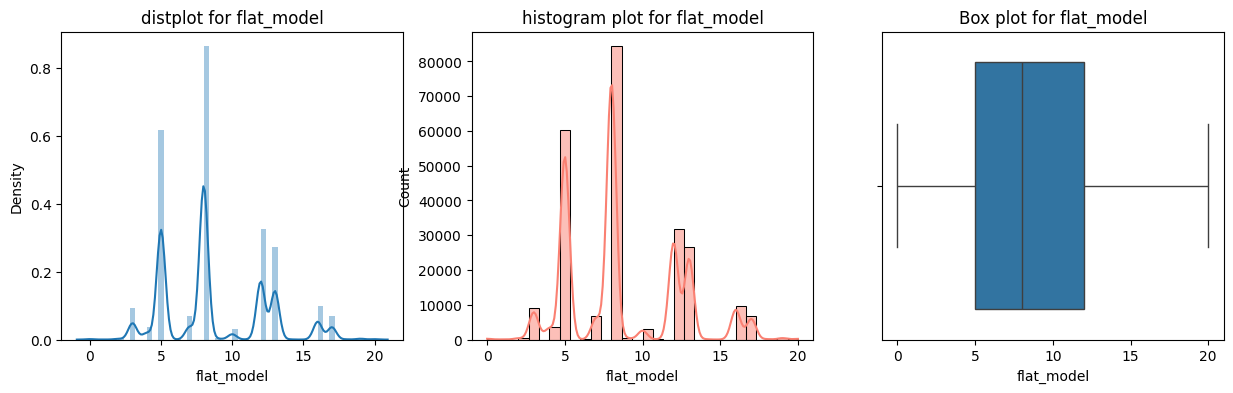

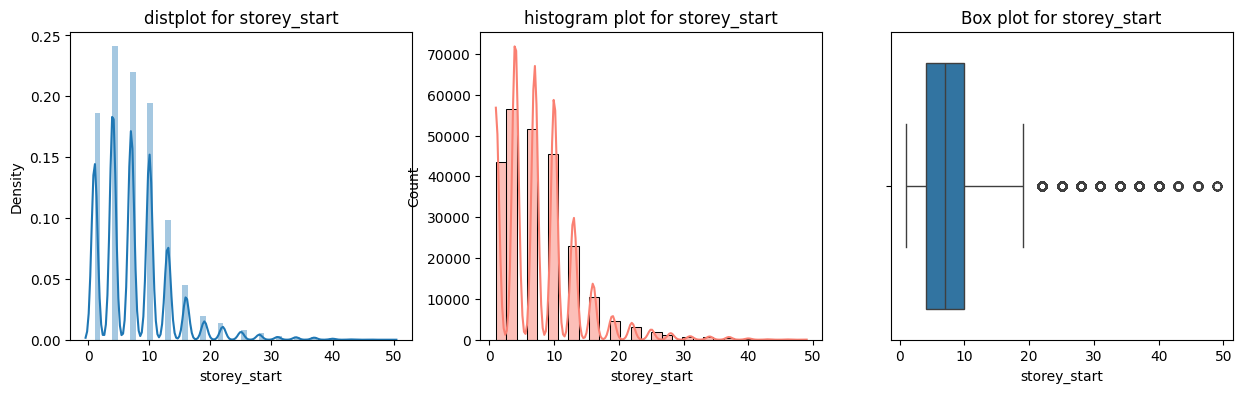

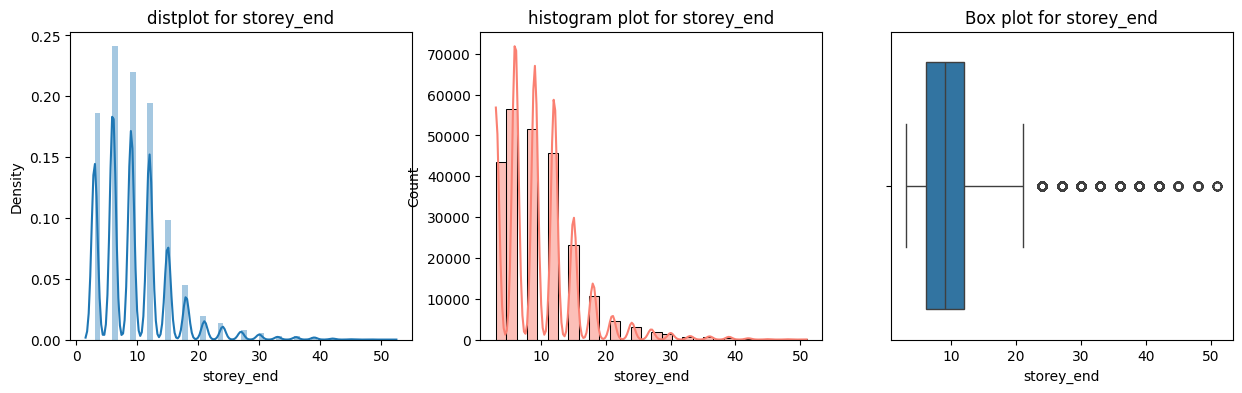

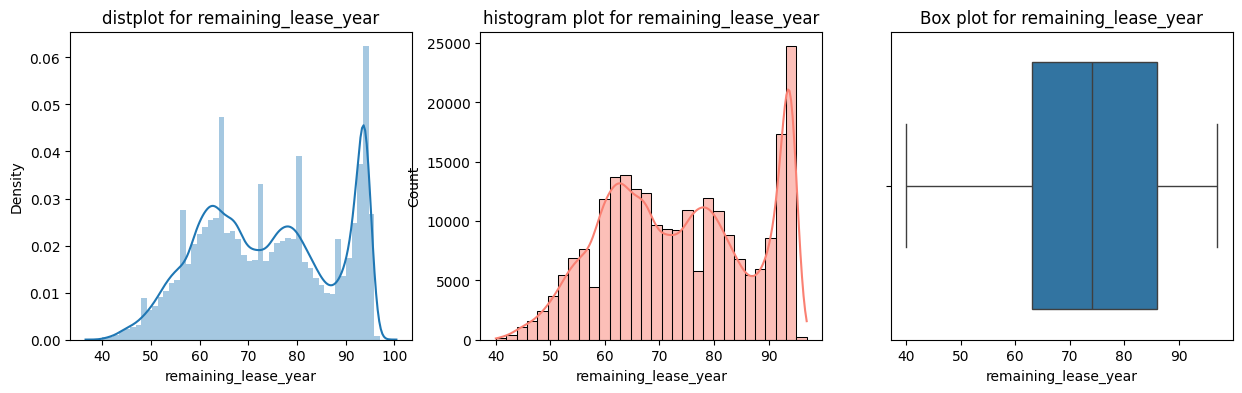

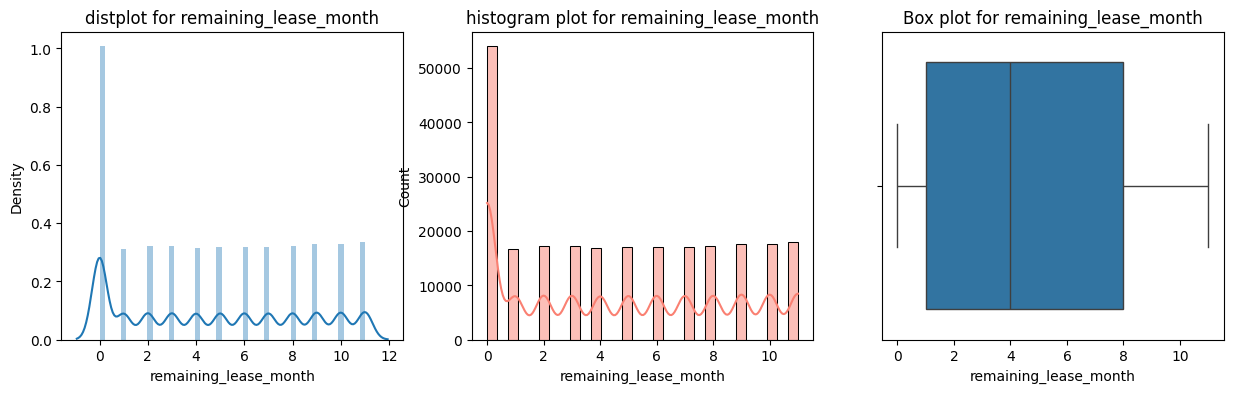

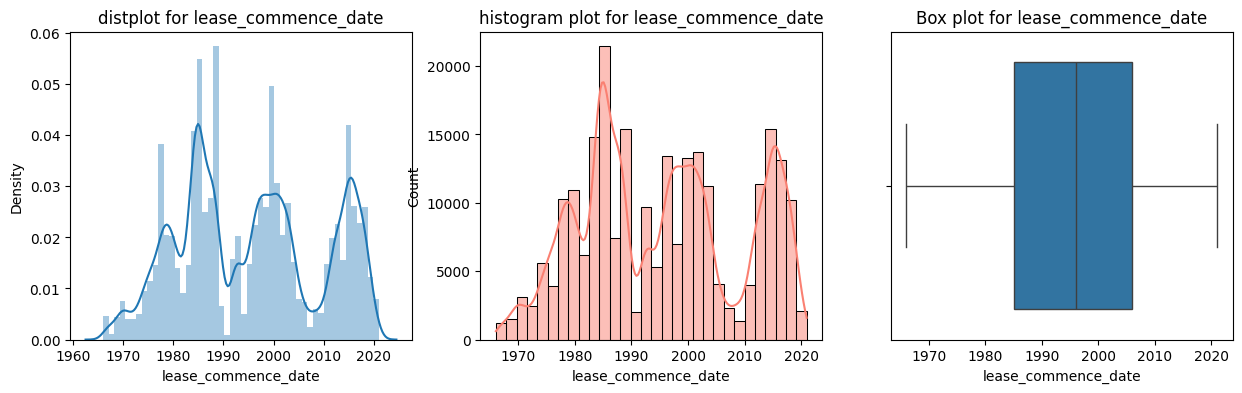

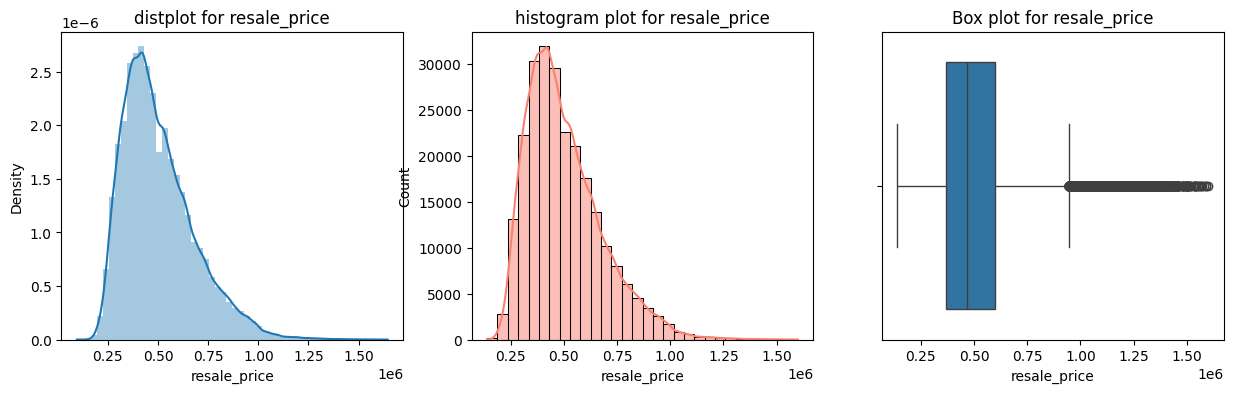

In [53]:
for i in df_final_2.columns:
    plot(df_final_2,i)

In [54]:
df_final_2.describe().T

,count,mean,std,min,25%,50%,75%,max
year,243809.0,2020.116292,2.937997,2015.0,2018.0,2020.0,2023.0,2025.0
town,243809.0,13.913834,7.954346,0.0,8.0,14.0,21.0,25.0
flat_type,243809.0,3.112924,0.919701,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,243809.0,96.911633,24.058794,31.0,80.0,93.0,112.0,366.7
flat_model,243809.0,8.673306,3.633941,0.0,5.0,8.0,12.0,20.0
storey_start,243809.0,7.668712,5.854384,1.0,4.0,7.0,10.0,49.0
storey_end,243809.0,9.668712,5.854384,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,243809.0,73.931401,13.694038,40.0,63.0,74.0,86.0,97.0
remaining_lease_month,243809.0,4.710429,3.762173,0.0,1.0,4.0,8.0,11.0
lease_commence_date,243809.0,1995.477681,13.896941,1966.0,1985.0,1996.0,2006.0,2021.0


skewness handling

In [55]:
df_final_3= df_final_2.copy()

In [56]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price

In [57]:
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])

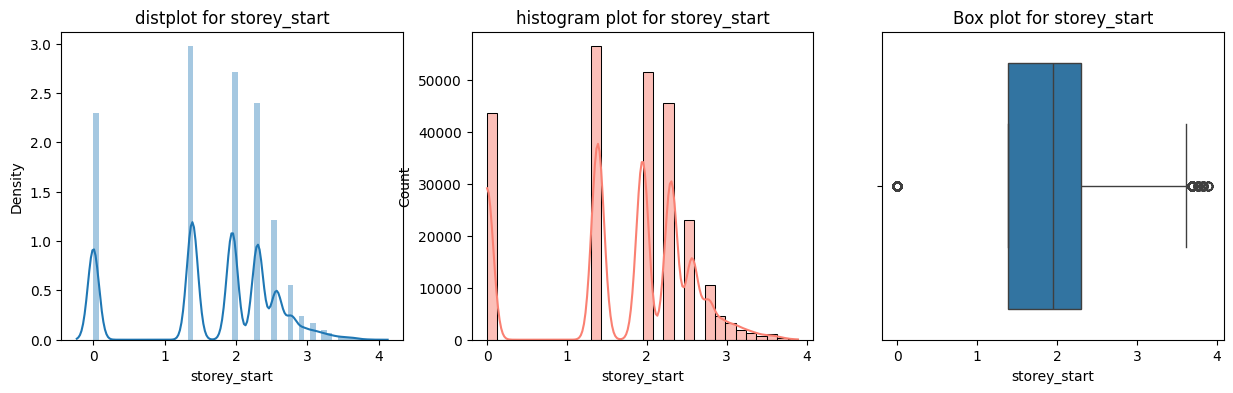

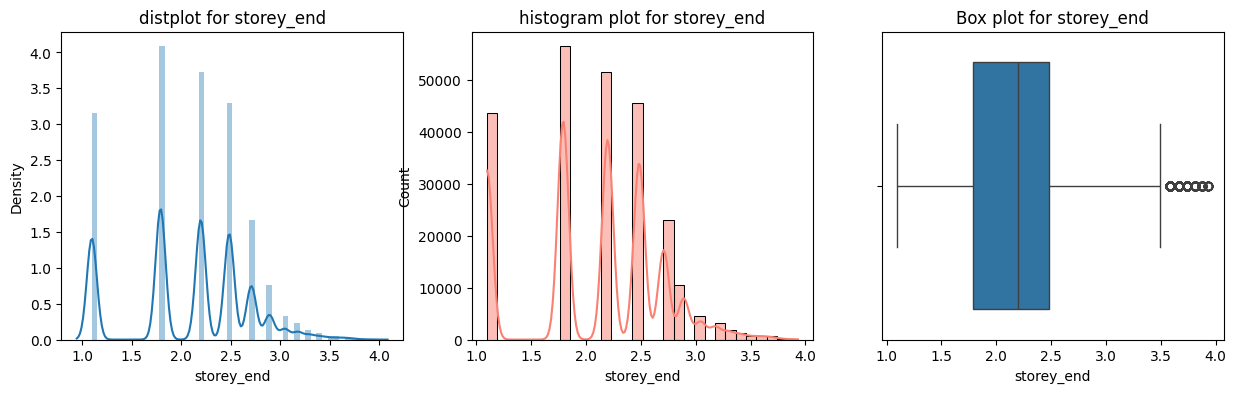

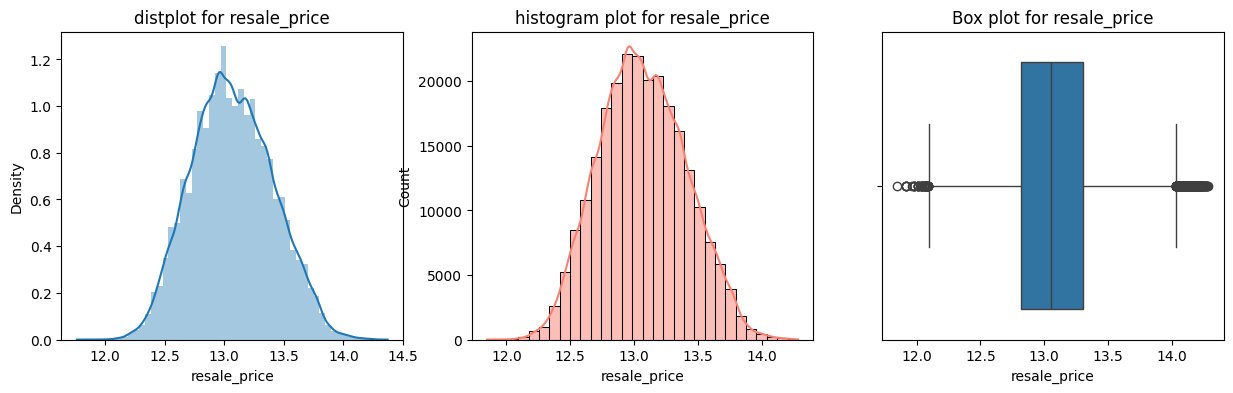

In [58]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

Outliers Handling - Interquartile Range(IQR) Method

In [59]:
df_final_4= df_final_3.copy()

In [60]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price
# Recorrect the Outliers

In [61]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [62]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [63]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)

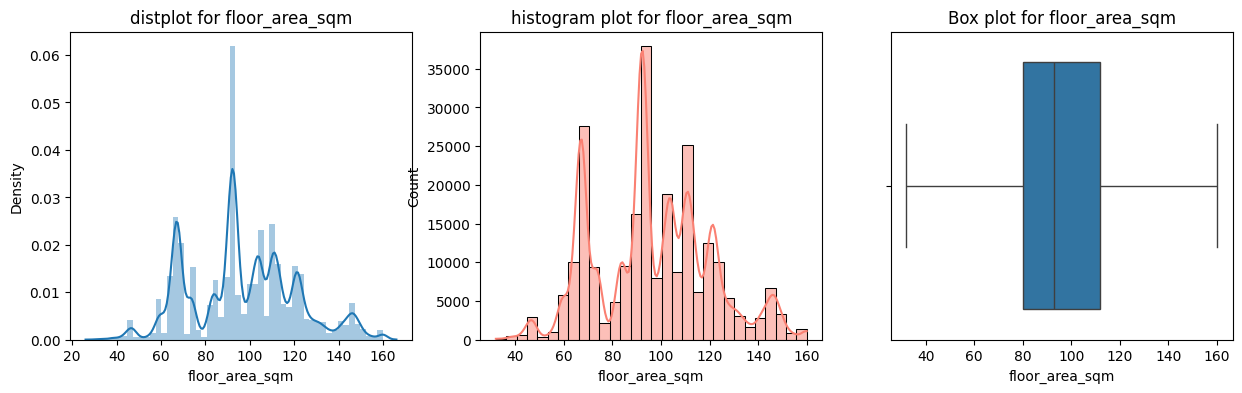

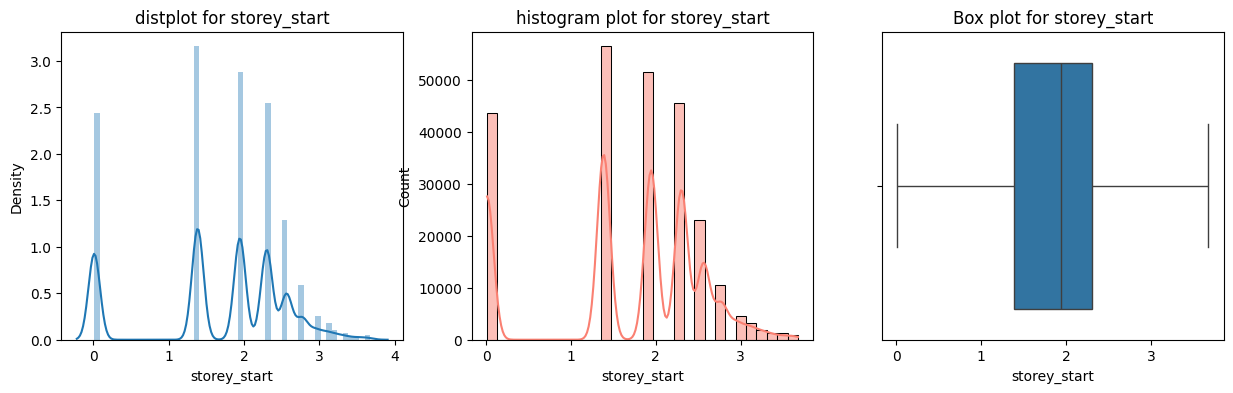

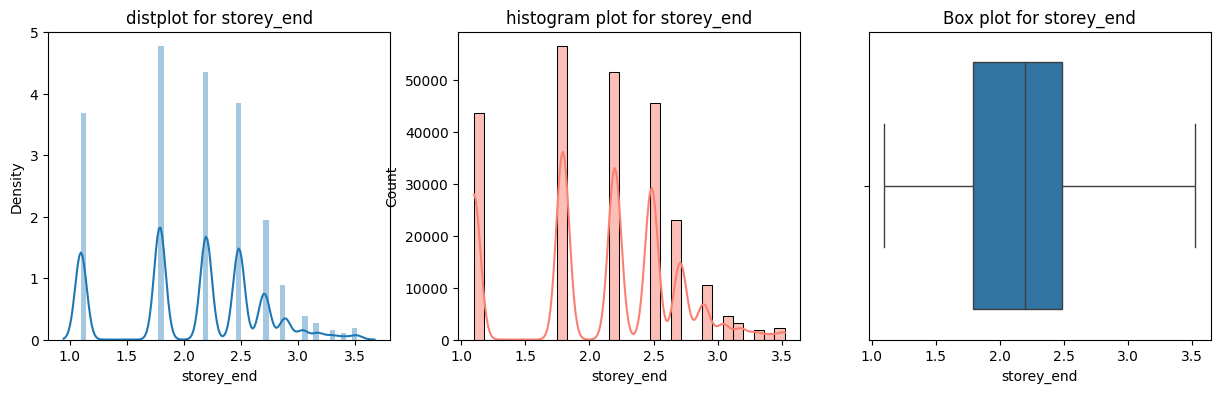

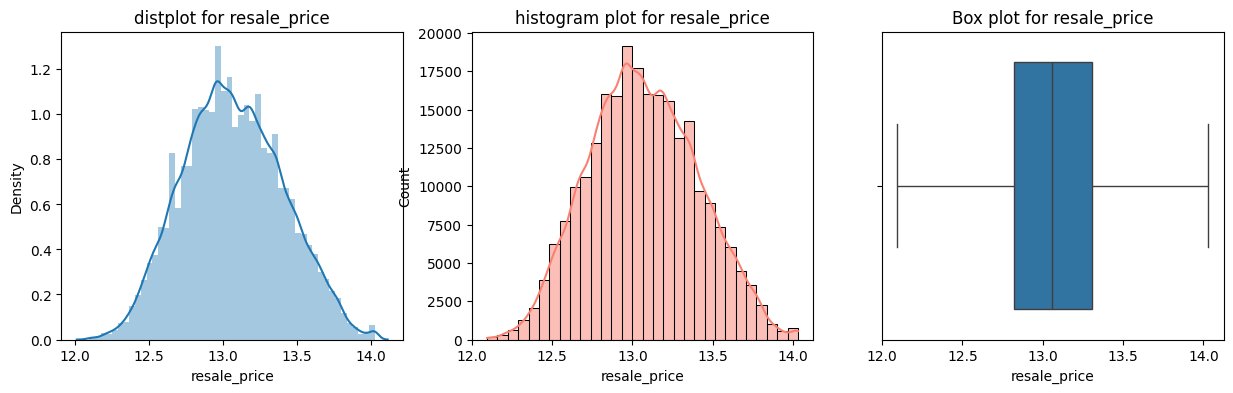

In [64]:
for k in outlier_columns:
    plot(df_final_4,k)

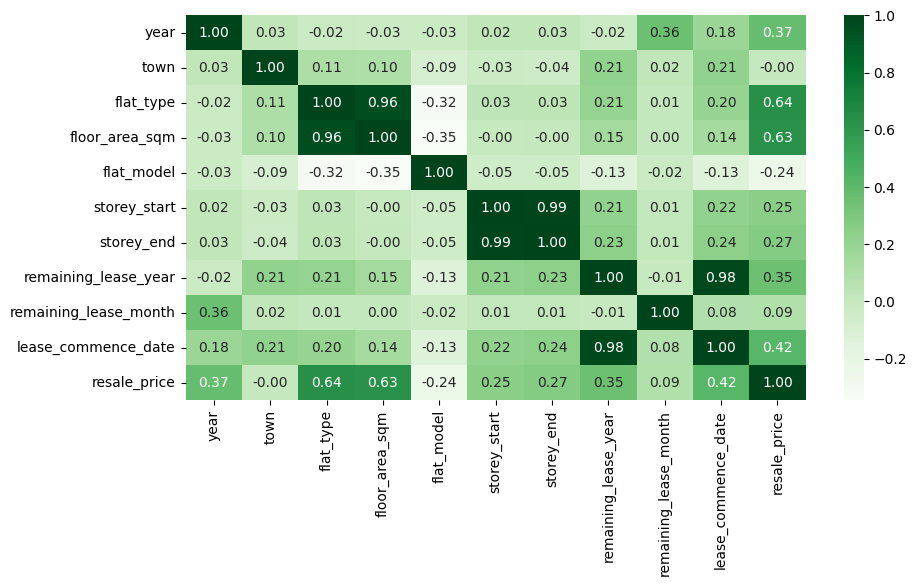

In [65]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

Model Selection (Regression)

In [66]:
df_final_5= df_final_4.copy()

In [67]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,243809.0,2020.116292,2.937997,2015.000000,2018.000000,2020.000000,2023.000000,2025.000000
town,243809.0,13.913834,7.954346,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,243809.0,3.112924,0.919701,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,243809.0,96.845519,23.845933,32.000000,80.000000,93.000000,112.000000,160.000000
flat_model,243809.0,8.673306,3.633941,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,243809.0,1.696365,0.921807,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,243809.0,2.094093,0.602027,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,243809.0,73.931401,13.694038,40.000000,63.000000,74.000000,86.000000,97.000000
remaining_lease_month,243809.0,4.710429,3.762173,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,243809.0,1995.477681,13.896941,1966.000000,1985.000000,1996.000000,2006.000000,2021.000000


In [68]:
np.exp(13.942690)

np.float64(1135620.7776035476)

In [69]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1135620]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
36467,2016,12,14,2.0,259.0,18.0,6873,1,3,54,0,1972,1150000.0
38448,2017,2,2,4.0,120.0,4.0,3255,40,42,93,7,2011,1180000.0
47892,2017,7,18,5.0,156.0,3.0,1255,19,21,77,3,1995,1160000.0
54395,2017,11,7,4.0,107.0,20.0,1971,43,45,92,2,2011,1138000.0
60199,2018,3,7,4.0,107.0,20.0,1968,37,39,91,10,2011,1145000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243618,2025,5,23,4.0,113.0,5.0,232,16,18,94,4,2020,1400000.0
243621,2025,5,23,4.0,110.0,4.0,1088,10,12,85,11,2012,1390000.0
243622,2025,5,23,4.0,113.0,4.0,1111,16,18,86,0,2012,1430000.0
243623,2025,5,23,4.0,110.0,5.0,1242,22,24,79,9,2006,1260000.0


In [70]:
np.exp(12.104561)

np.float64(180694.13157722994)

In [71]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 180694]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8153,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6258,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3586,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1442,1,3,55,11,1975,180000.0
65495,2018,6,4,0.0,31.0,5.0,8153,1,3,55,10,1975,176000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120053,2020,11,4,1.0,42.0,17.0,5898,10,12,48,5,1970,180000.0
126747,2021,1,24,1.0,45.0,5.0,2372,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8153,4,6,53,1,1975,180000.0
197147,2023,8,22,2.0,67.0,8.0,6430,7,9,91,3,2015,150000.0


In [72]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [73]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [74]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6928667131681093, 'Mean_squared_error': 0.03528845416544603, 'Root_mean_squared_error': np.float64(0.18785221362934754), 'Mean_absolute_error': 0.14680655355172806}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6956321972245724, 'Mean_squared_error': 0.03502313154855359, 'Root_mean_squared_error': np.float64(0.1871446807915031), 'Mean_absolute_error': 0.14606841796160155}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9965973286690228, 'Mean_squared_error': 0.00039095407906401195, 'Root_mean_squared_error': np.float64(0.019772558738413496), 'Mean_absolute_error': 0.006946172812565194}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.929972671847298, 'Mean_squared_error': 0.008057936166445963, 'Root_mean_squared_error': np.float64(0.08976600785623677), 'Mean_absolute_error': 0.06387616187311249}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score'

In [75]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9580599702053024, 'Mean_squared_error': 0.0048259742563300356, 'Root_mean_squared_error': np.float64(0.06946923244379512), 'Mean_absolute_error': 0.0509042006032662}


In [76]:
df_final_5.iloc[10456]

,10456
year,2015.000000
town,4.000000
flat_type,2.000000
floor_area_sqm,74.000000
flat_model,8.000000
storey_start,0.011858
storey_end,1.098612
remaining_lease_year,68.000000
remaining_lease_month,0.000000
lease_commence_date,1985.000000


In [77]:
np.exp(12.815838)

np.float64(367999.92008841544)

In [78]:
user_data = np.array([[2015,4,2,74,8,0.011858,1.098612,68,0,1985]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(12.790036968948538)

In [79]:
np.exp(12.792003979535888)

np.float64(359332.7000997733)

In [100]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [101]:
import pickle
import numpy as np

In [102]:
with open("/content/Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [103]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(12.240437400476267)

In [104]:
np.exp(12.313923357750493)

np.float64(222776.28881715712)

In [97]:
%%writefile app.py

# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import streamlit as st
from streamlit_option_menu import option_menu
import pickle
from PIL import Image

def town_mapping(town_map):
    if town_map == 'ANG MO KIO':
        town_1 = int(0)
    elif town_map == 'BEDOK':
        town_1 = int(1)
    elif town_map == 'BISHAN':
        town_1= int(2)
    elif town_map == 'BUKIT BATOK':
        town_1= int(3)
    elif town_map == 'BUKIT MERAH':
        town_1= int(4)
    elif town_map == 'BUKIT PANJANG':
        town_1= int(5)

    elif town_map == 'BUKIT TIMAH':
        town_1= int(6)
    elif town_map == 'CENTRAL AREA':
        town_1= int(7)
    elif town_map == 'CHOA CHU KANG':
        town_1= int(8)
    elif town_map == 'CLEMENTI':
        town_1= int(9)
    elif town_map == 'GEYLANG':
        town_1= int(10)

    elif town_map == 'HOUGANG':
        town_1 = int(11)
    elif town_map == 'JURONG EAST':
        town_1= int(12)
    elif town_map == 'JURONG WEST':
        town_1= int(13)
    elif town_map == 'KALLANG/WHAMPOA':
        town_1= int(14)
    elif town_map == 'MARINE PARADE':
        town_1= int(15)

    elif town == 'PASIR RIS':
        town_1= int(16)
    elif town == 'PUNGGOL':
        town_1= int(17)
    elif town == 'QUEENSTOWN':
        town_1= int(18)
    elif town == 'SEMBAWANG':
        town_1= int(19)
    elif town == 'SENGKANG':
        town_1= int(20)

    elif town == 'SERANGOON':
        town_1= int(21)
    elif town == 'TAMPINES':
        town_1= int(22)
    elif town == 'TOA PAYOH':
        town_1= int(23)
    elif town == 'WOODLANDS':
        town_1= int(24)
    elif town == 'YISHUN':
        town_1= int(25)

    return town_1

def flat_type_mapping(flt_type):

    if flt_type == '3 ROOM':
        flat_type_1= int(2)
    elif flt_type == '4 ROOM':
        flat_type_1= int(3)
    elif flt_type == '5 ROOM':
        flat_type_1= int(4)
    elif flt_type == '2 ROOM':
        flat_type_1= int(1)
    elif flt_type == 'EXECUTIVE':
        flat_type_1= int(5)
    elif flt_type == '1 ROOM':
        flat_type_1= int(0)
    elif flt_type == 'MULTI-GENERATION':
        flat_type_1= int(6)

    return flat_type_1

def flat_model_mapping(fl_m):

    if fl_m == 'Improved':
        flat_model_1= int(5)
    elif fl_m == 'New Generation':
        flat_model_1= int(12)

    elif fl_m == 'Model A':
        flat_model_1= int(8)
    elif fl_m == 'Standard':
        flat_model_1= int(17)
    elif fl_m == 'Simplified':
        flat_model_1= int(16)
    elif fl_m == 'Premium Apartment':
        flat_model_1= int(13)
    elif fl_m == 'Maisonette':
        flat_model_1= int(7)

    elif fl_m == 'Apartment':
        flat_model_1= int(3)
    elif fl_m == 'Model A2':
        flat_model_1= int(10)
    elif fl_m == 'Type S1':
        flat_model_1= int(19)
    elif fl_m == 'Type S2':
        flat_model_1= int(20)
    elif fl_m == 'Adjoined flat':
        flat_model_1= int(2)

    elif fl_m == 'Terrace':
        flat_model_1= int(18)
    elif fl_m == 'DBSS':
        flat_model_1= int(4)
    elif fl_m == 'Model A-Maisonette':
        flat_model_1= int(9)
    elif fl_m == 'Premium Maisonette':
        flat_model_1= int(15)
    elif fl_m == 'Multi Generation':
        flat_model_1= int(11)

    elif fl_m == 'Premium Apartment Loft':
        flat_model_1= int(14)
    elif fl_m == 'Improved-Maisonette':
        flat_model_1= int(6)
    elif fl_m == '2-room':
        flat_model_1= int(0)
    elif fl_m == '3Gen':
        flat_model_1= int(1)

    return flat_model_1


def predict_price(year,town,flat_type,flr_area_sqm,flat_model,stry_start,stry_end,re_les_year,
              re_les_month,les_coms_dt):

    year_1= int(year)
    town_2= town_mapping(town)
    flt_ty_2= flat_type_mapping(flat_type)
    flr_ar_sqm_1= int(flr_area_sqm)
    flt_model_2= flat_model_mapping(flat_model)
    str_str= np.log(int(stry_start))
    str_end= np.log(int(stry_end))
    rem_les_year= int(re_les_year)
    rem_les_month= int(re_les_month)
    lese_coms_dt= int(les_coms_dt)


    with open(r"/content/Resale_Flat_Prices_Model_1.pkl","rb") as f:
        regg_model= pickle.load(f)

    user_data = np.array([[year_1,town_2,flt_ty_2,flr_ar_sqm_1,
                           flt_model_2,str_str,str_end,rem_les_year,rem_les_month,
                           lese_coms_dt]])
    y_pred_1 = regg_model.predict(user_data)
    price= np.exp(y_pred_1[0])

    return round(price)



st.set_page_config(layout="wide")

st.title("SINGAPORE RESALE FLAT PRICES PREDICTING")
st.write("")

with st.sidebar:
    select= option_menu("MAIN MENU",["Home", "Price Prediction", "About"])


if select == "Home":
    img1 = Image.open("/content/download.jpg")
    st.image(img1, caption="Image 1", width=200)

    img2 = Image.open("/content/images (1).jpg")
    st.image(img2, caption="Image 2", width=200)

    img3 = Image.open("/content/images.jpg")
    st.image(img3, caption="Image 3", width=200)


    st.header("HDB Flats:")

    st.write('''The majority of Singaporeans live in public housing provided by the HDB.
    HDB flats can be purchased either directly from the HDB as a new unit or through the resale market from existing owners.''')

    st.header("Resale Process:")

    st.write('''In the resale market, buyers purchase flats from existing flat owners, and the transactions are facilitated through the HDB resale process.
    The process involves a series of steps, including valuation, negotiations, and the submission of necessary documents.''')

    st.header("Valuation:")

    st.write('''The HDB conducts a valuation of the flat to determine its market value. This is important for both buyers and sellers in negotiating a fair price.''')

    st.header("Eligibility Criteria:")

    st.write("Buyers and sellers in the resale market must meet certain eligibility criteria, including citizenship requirements and income ceilings.")

    st.header("Resale Levy:")

    st.write("For buyers who have previously purchased a subsidized flat from the HDB, there might be a resale levy imposed when they purchase another flat from the HDB resale market.")

    st.header("Grant Schemes:")

    st.write("There are various housing grant schemes available to eligible buyers, such as the CPF Housing Grant, which provides financial assistance for the purchase of resale flats.")

    st.header("HDB Loan and Bank Loan:")

    st.write("Buyers can choose to finance their flat purchase through an HDB loan or a bank loan. HDB loans are provided by the HDB, while bank loans are obtained from commercial banks.")

    st.header("Market Trends:")

    st.write("The resale market is influenced by various factors such as economic conditions, interest rates, and government policies. Property prices in Singapore can fluctuate based on these factors.")

    st.header("Online Platforms:")

    st.write("There are online platforms and portals where sellers can list their resale flats, and buyers can browse available options.")

elif select == "Price Prediction":

    col1,col2= st.columns(2)
    with col1:

        year= st.selectbox("Select the Year",["2015", "2016", "2017", "2018", "2019", "2020", "2021",
                           "2022", "2023", "2024"])

        town= st.selectbox("Select the Town", ['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
                                            'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
                                            'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
                                            'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
                                            'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
                                            'TOA PAYOH', 'WOODLANDS', 'YISHUN'])

        flat_type= st.selectbox("Select the Flat Type", ['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
                                                        'MULTI-GENERATION'])

        flr_area_sqm= st.number_input("Enter the Value of Floor Area sqm (Min: 31 / Max: 280")

        flat_model= st.selectbox("Select the Flat Model", ['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
                                                        'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
                                                        'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
                                                        'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
                                                        'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'])

    with col2:

        stry_start= st.number_input("Enter the Value of Storey Start")

        stry_end= st.number_input("Enter the Value of Storey End")

        re_les_year= st.number_input("Enter the Value of Remaining Lease Year (Min: 42 / Max: 97)")

        re_les_month= st.number_input("Enter the Value of Remaining Lease Month (Min: 0 / Max: 11)")

        les_coms_dt= st.selectbox("Select the Lease_Commence_Date", [str(i) for i in range(1966,2023)])

    button= st.button("Predict the Price", use_container_width= True)

    if button:


        pre_price= predict_price(year, town, flat_type, flr_area_sqm, flat_model,
                        stry_start, stry_end, re_les_year, re_les_month, les_coms_dt)

        st.write("## :green[**The Predicted Price is :**]",pre_price)


elif select == "About":

    st.header(":blue[Data Collection and Preprocessing:]")
    st.write("Collect a dataset of resale flat transactions from the Singapore Housing and Development Board (HDB) for the years 1990 to Till Date. Preprocess the data to clean and structure it for machine learning.")

    st.header(":blue[Feature Engineering:]")
    st.write("Extract relevant features from the dataset, including town, flat type, storey range, floor area, flat model, and lease commence date. Create any additional features that may enhance prediction accuracy.")

    st.header(":blue[Model Selection and Training:]")
    st.write("Choose an appropriate machine learning model for regression (e.g., linear regression, decision trees, or random forests). Train the model on the historical data, using a portion of the dataset for training.")

    st.header(":blue[Model Evaluation:]")
    st.write("Evaluate the model's predictive performance using regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or Root Mean Squared Error (RMSE) and R2 Score.")

    st.header(":blue[Streamlit Web Application:]")
    st.write("Develop a user-friendly web application using Streamlit that allows users to input details of a flat (town, flat type, storey range, etc.). Utilize the trained machine learning model to predict the resale price based on user inputs.")

    st.header(":blue[Deployment on Render:]")
    st.write("Deploy the Streamlit application on the Render platform to make it accessible to users over the internet.")

    st.header(":blue[Testing and Validation:]")
    st.write("Thoroughly test the deployed application to ensure it functions correctly and provides accurate predictions.")


Overwriting app.py


In [98]:
!wget -q -O - ipv4.icanhazip.com

35.237.62.50


In [94]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 3s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼npm notice
npm notice New major version of npm available! 10.8.2 -> 11.4.1
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.4.1
npm notice To update run: npm install -g npm@11.4.1
npm notice
⠼

In [95]:
!npm audit fix --force

npm warn using --force Recommended protections disabled.
⠙⠹⠸⠼⠴⠦npm warn audit Updating localtunnel to 1.8.3, which is a SemVer major change.
⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼npm warn deprecated cryptiles@2.0.5: This version has been deprecated in accordance with the hapi support policy (hapi.im/support). Please upgrade to the latest version to get the best features, bug fixes, and security patches. If you are unable to upgrade at this time, paid support is available for older versions (hapi.im/commercial).
⠴npm warn deprecated sntp@1.0.9: This module moved to @hapi/sntp. Please make sure to switch over as this distribution is no longer supported and may contain bugs and critical security issues.
⠴⠦npm warn deprecated har-validator@4.2.1: this library is no longer supported
⠦npm warn deprecated boom@2.10.1: This version has been deprecated in accordance with the hapi support policy (hapi.im/support). Please upgrade to the latest version to get the best

In [99]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

your url is: https://sour-books-search.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.62.50:8501

────────────────────────── Traceback (most recent call last) ───────────────────────────
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/exec_code.py:  
  121 in exec_func_with_error_handling                                                  
                                                                                        
  /usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner  
  .py:645 in code_to_exec                                                               
                                                                                        
  /content/app.py:274 in <module>                                                       
                                                                 

In [88]:
!pip install Streamlit
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 9.5 MB/s eta 0:00:00


In [89]:
!pip install streamlit-aggrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 30.6 MB/s eta 0:00:00


In [90]:
!pip install --upgrade streamlit streamlit-option-menu


In [91]:
!streamlit cache clear